#  Youtube Web Scrapping 

In [1]:
import re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [2]:
# url='https://pl.youtubers.me/india/all/top-1000-youtube-channels-in-india/en'

url="https://pl.youtubers.me/india/all/top-1000-youtube-channels-in-india/en"

In [3]:
url

'https://pl.youtubers.me/india/all/top-1000-youtube-channels-in-india/en'

In [4]:
request_header= {'Content-Type':'text/css; charset=UTF-8',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
     'Accept-Encoding': 'gzip, deflate, br'
}

In [5]:
response=requests.get(url,headers=request_header)

In [6]:
print(response.status_code)

200


In [7]:
response.headers

{'Server': 'nginx/1.16.1', 'Date': 'Thu, 16 Nov 2023 05:49:47 GMT', 'Content-Type': 'text/html', 'Content-Length': '207657', 'Last-Modified': 'Fri, 10 Nov 2023 14:51:09 GMT', 'Connection': 'keep-alive', 'ETag': '"654e435d-32b29"', 'Content-Encoding': 'gzip'}

In [8]:
html_code=response.text

In [9]:
html_code

'<!DOCTYPE html>\n<html lang="en">\n<head>\n  <meta charset="utf-8">\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" />\n  <meta name="robots" content="index,follow,noimageindex" />\n  <meta property="og:site_name" content="YouTubers.me"/>\n      <title>Top 1000 Youtube channels - India</title>\n<meta name="description" content="Top 1000 Youtube channels - India" />\n\n\n\n<link rel="canonical" href="https://pl.youtubers.me/india/all/top-1000-youtube-channels-in-india/en" />\n\n<meta property="og:image" content="https://yt3.ggpht.com/y1F4EOGuP19nZcBlzcyCtnHiYhkAOPQiRxwKeaGrOjXarUZZjcx_heiDiC06_Qj6ERea_qWK9A=s240-c-k-c0x00ffffff-no-rj" />\n<meta property="og:title" content="Top 1000 Youtube channels - India" />\n<meta property="og:url" content="https://pl.youtubers.me/india/all/top-1000-youtube-channels-in-india/en" />\n<meta property="og:description"

In [10]:
soup=BeautifulSoup(html_code)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="index,follow,noimageindex" name="robots"/>
<meta content="YouTubers.me" property="og:site_name"/>
<title>Top 1000 Youtube channels - India</title>
<meta content="Top 1000 Youtube channels - India" name="description"/>
<link href="https://pl.youtubers.me/india/all/top-1000-youtube-channels-in-india/en" rel="canonical"/>
<meta content="https://yt3.ggpht.com/y1F4EOGuP19nZcBlzcyCtnHiYhkAOPQiRxwKeaGrOjXarUZZjcx_heiDiC06_Qj6ERea_qWK9A=s240-c-k-c0x00ffffff-no-rj" property="og:image"/>
<meta content="Top 1000 Youtube channels - India" property="og:title"/>
<meta content="https://pl.youtubers.me/india/all/top-1000-youtube-channels-in-india/en" property="og:url"/>
<meta content="Top 1000 Youtube channels - India" property="og:description"

## Fretch Entire Data

In [11]:
main_content=soup.find('div',attrs={'class':"main col col-sm-12"})

In [12]:
main_content

<div class="main col col-sm-12">
<h2>Top Youtube channels</h2>
<div class="top-charts-box">
<table class="top-charts">
<tr>
<th>rank</th><th>Youtuber</th><th>subscribers</th><th>video views</th><th>video count</th><th>category</th><th>started</th>
</tr>
<tr>
<td>1</td>
<td>
<a href="/t-series/youtuber-stats/en">
<img alt="T-Series" class="lazy" data-src="https://yt3.ggpht.com/y1F4EOGuP19nZcBlzcyCtnHiYhkAOPQiRxwKeaGrOjXarUZZjcx_heiDiC06_Qj6ERea_qWK9A=s88-c-k-c0x00ffffff-no-rj" src="data:image/gif;base64,R0lGODdhAQABAJEAAAAAAPLw8P///wAAACH5BAkAAAMALAAAAAABAAEAAAICTAEAOw=="/>T-Series
    </a>
</td>
<td>252,000,000</td>
<td>237,488,717,837</td>
<td>19,794</td>
<td><a href="/india/music/top-1000-music-youtube-channels-in-india/en">Music</a></td>
<td>2006</td>
</tr>
<tr>
<td>2</td>
<td>
<a href="/set-india/youtuber-stats/en">
<img alt="SET India" class="lazy" data-src="https://yt3.ggpht.com/eu051krrRNQMMi5h6ynfnvhFJzxzSKulJQ42g5v72MQ9Bvv8KdpNIa6yM-0iGpnDgSF0itAD=s88-c-k-c0x00ffffff-no-rj" sr

## Fretch Sub data


## Fretch the Title

In [13]:
sub_content=main_content.find('table',attrs={'class':'top-charts'})

In [14]:
sub_content.text

"\n\nrankYoutubersubscribersvideo viewsvideo countcategorystarted\n\n\n1\n\n\nT-Series\n    \n\n252,000,000\n237,488,717,837\n19,794\nMusic\n2006\n\n\n2\n\n\nSET India\n    \n\n164,000,000\n153,562,562,482\n121,019\nShows\n2006\n\n\n3\n\n\nSony SAB\n    \n\n86,700,000\n106,373,500,472\n75,313\nShows\n2007\n\n\n4\n\n\nColors TV\n    \n\n68,200,000\n65,471,430,109\n121,710\nShows\n2008\n\n\n5\n\n\nZee Music Company\n    \n\n102,000,000\n61,556,002,571\n9,408\nMusic\n2014\n\n\n6\n\n\nChuChu TV Nursery Rhymes & Kids Songs\n    \n\n68,500,000\n48,012,185,336\n715\nEducation\n2013\n\n\n7\n\n\nWave Music\n    \n\n59,500,000\n41,342,735,314\n19,720\nMusic\n2014\n\n\n8\n\n\nYRF\n    \n\n56,800,000\n37,545,079,015\n3,843\nFilm & Animation\n2006\n\n\n9\n\n\nTips Official\n    \n\n62,000,000\n35,324,377,300\n5,093\nMusic\n2007\n\n\n10\n\n\nVijay Television\n    \n\n21,800,000\n33,261,234,887\n57,945\nEntertainment\n2007\n\n\n11\n\n\nInfobells - Hindi\n    \n\n56,900,000\n32,804,274,867\n608\nEduca

In [15]:
title = sub_content.find_all("a")

In [16]:
data=sub_content.find_all('td')

In [17]:
for i in data:
    print(i.text)

1


T-Series
    

252,000,000
237,488,717,837
19,794
Music
2006
2


SET India
    

164,000,000
153,562,562,482
121,019
Shows
2006
3


Sony SAB
    

86,700,000
106,373,500,472
75,313
Shows
2007
4


Colors TV
    

68,200,000
65,471,430,109
121,710
Shows
2008
5


Zee Music Company
    

102,000,000
61,556,002,571
9,408
Music
2014
6


ChuChu TV Nursery Rhymes & Kids Songs
    

68,500,000
48,012,185,336
715
Education
2013
7


Wave Music
    

59,500,000
41,342,735,314
19,720
Music
2014
8


YRF
    

56,800,000
37,545,079,015
3,843
Film & Animation
2006
9


Tips Official
    

62,000,000
35,324,377,300
5,093
Music
2007
10


Vijay Television
    

21,800,000
33,261,234,887
57,945
Entertainment
2007
11


Infobells - Hindi
    

56,900,000
32,804,274,867
608
Education
2014
12


T-Series Bhakti Sagar
    

64,100,000
31,453,062,173
26,707
Music
2011
13


Sony Music India
    

58,400,000
29,919,897,899
4,132
Music
2009
14


Speed Records
    

43,000,000
27,487,097,366
11,104
Music
2012
15


# Channel Names

In [18]:
channel_names=[]
channels=[]

for i in title:
    channels.append(i.text)
    
a=channels[::2]
for i in a:
    channel_names.append(i)

In [19]:
channel_names

['\nT-Series\n    ',
 '\nSET India\n    ',
 '\nSony SAB\n    ',
 '\nColors TV\n    ',
 '\nZee Music Company\n    ',
 '\nChuChu TV Nursery Rhymes & Kids Songs\n    ',
 '\nWave Music\n    ',
 '\nYRF\n    ',
 '\nTips Official\n    ',
 '\nVijay Television\n    ',
 '\nInfobells - Hindi\n    ',
 '\nT-Series Bhakti Sagar\n    ',
 '\nSony Music India\n    ',
 '\nSpeed Records\n    ',
 '\nAaj Tak\n    ',
 '\nAditya Music India\n    ',
 '\nGoldmines\n    ',
 '\nKL BRO Biju Rithvik\n    ',
 '\nSun TV\n    ',
 '\nT-Series Bollywood Classics\n    ',
 '\netvteluguindia\n    ',
 '\nShemaroo\n    ',
 '\nShorts Break\n    ',
 '\nT-Series Apna Punjab\n    ',
 '\nDushyant kukreja\n    ',
 '\nZEE5\n    ',
 '\nZee News\n    ',
 '\ninfobells - Tamil\n    ',
 '\nMazhavil Manorama\n    ',
 '\nGoldmines Gaane Sune Ansune\n    ',
 '\nIndiaTV\n    ',
 '\nWowKidz\n    ',
 '\nWorldwide Records Bhojpuri\n    ',
 '\nJkk Entertainment\n    ',
 '\nTarang TV\n    ',
 '\nDangal TV Channel\n    ',
 '\nUltra Bollywood\n  

#  Category

In [20]:
category=channels[1::2]

In [21]:
category

['Music',
 'Shows',
 'Shows',
 'Shows',
 'Music',
 'Education',
 'Music',
 'Film & Animation',
 'Music',
 'Entertainment',
 'Education',
 'Music',
 'Music',
 'Music',
 'News & Politics',
 'Music',
 'Film & Animation',
 'Entertainment',
 'People & Blogs',
 'Music',
 'Entertainment',
 'Entertainment',
 'Comedy',
 'Music',
 'Entertainment',
 'Entertainment',
 'News & Politics',
 'Education',
 'Entertainment',
 'Music',
 'News & Politics',
 'Film & Animation',
 'Music',
 'Comedy',
 'Entertainment',
 'Entertainment',
 'Trailers',
 'Entertainment',
 'Education',
 'Music',
 'People & Blogs',
 'Howto & Style',
 'People & Blogs',
 'People & Blogs',
 'People & Blogs',
 'Entertainment',
 'People & Blogs',
 'Entertainment',
 'Music',
 'Entertainment',
 'Music',
 'People & Blogs',
 'Entertainment',
 'Entertainment',
 'Comedy',
 'People & Blogs',
 'Comedy',
 'Comedy',
 'People & Blogs',
 'Entertainment',
 'News & Politics',
 'Entertainment',
 'News & Politics',
 'Movies',
 'Music',
 'Entertainment',

# Subscribers

In [22]:
subscribers=[]
for i in data[2::7]:
    subscribers.append(i.text)
    

In [23]:
subscribers

['252,000,000',
 '164,000,000',
 '86,700,000',
 '68,200,000',
 '102,000,000',
 '68,500,000',
 '59,500,000',
 '56,800,000',
 '62,000,000',
 '21,800,000',
 '56,900,000',
 '64,100,000',
 '58,400,000',
 '43,000,000',
 '59,700,000',
 '29,200,000',
 '91,600,000',
 '33,900,000',
 '25,200,000',
 '37,300,000',
 '19,900,000',
 '49,800,000',
 '32,600,000',
 '35,300,000',
 '33,800,000',
 '14,700,000',
 '32,900,000',
 '30,100,000',
 '16,700,000',
 '39,700,000',
 '37,300,000',
 '33,500,000',
 '32,700,000',
 '37,400,000',
 '8,170,000',
 '24,900,000',
 '37,600,000',
 '9,830,000',
 '30,000,000',
 '34,500,000',
 '25,600,000',
 '30,600,000',
 '38,700,000',
 '24,500,000',
 '14,300,000',
 '13,600,000',
 '13,400,000',
 '16,000,000',
 '34,600,000',
 '18,800,000',
 '17,200,000',
 '23,100,000',
 '12,900,000',
 '17,900,000',
 '9,960,000',
 '17,100,000',
 '15,500,000',
 '33,500,000',
 '22,000,000',
 '25,700,000',
 '26,400,000',
 '23,300,000',
 '9,380,000',
 '30,200,000',
 '16,200,000',
 '13,000,000',
 '26,300,00

# video views

In [24]:
views_counts=[]

for i in data[3::7]:
    views_counts.append(i.text)

# video count

In [25]:
video_count=[]

for i in data[4::7]:
    video_count.append(i.text)

In [26]:
video_count

['19,794',
 '121,019',
 '75,313',
 '121,710',
 '9,408',
 '715',
 '19,720',
 '3,843',
 '5,093',
 '57,945',
 '608',
 '26,707',
 '4,132',
 '11,104',
 '312,396',
 '22,027',
 '7,098',
 '2,082',
 '71,475',
 '2,029',
 '131,205',
 '11,298',
 '518',
 '7,940',
 '988',
 '106,692',
 '194,327',
 '587',
 '94,859',
 '3,628',
 '286,073',
 '5,204',
 '6,720',
 '225',
 '53,345',
 '23,773',
 '9,458',
 '121,758',
 '537',
 '4,027',
 '1,065',
 '573',
 '328,909',
 '873',
 '10,440',
 '59,458',
 '1,784',
 '1,634',
 '684',
 '5,883',
 '9,037',
 '11,565',
 '12,588',
 '1,558',
 '3,614',
 '325,082',
 '971',
 '224',
 '477',
 '738',
 '54,913',
 '6,333',
 '211,944',
 '6,025',
 '2,988',
 '1,841',
 '8,025',
 '524',
 '949',
 '1,151',
 '990',
 '1,498',
 '532',
 '130',
 '338,523',
 '1,497',
 '23,969',
 '276,117',
 '335,818',
 '16,931',
 '292,728',
 '21,720',
 '3,495',
 '1,645',
 '8,214',
 '468',
 '442,429',
 '113,547',
 '916',
 '702',
 '3,976',
 '4,220',
 '1,090',
 '2,253',
 '920',
 '18,133',
 '247,739',
 '537',
 '1,998',
 

In [27]:
year=[]
for i in data[6::7]:
    year.append(i.text)

In [28]:
Rank=[]
for i in data[::7]:
    Rank.append(i.text)
    

In [29]:
print('channel_name',len(channel_names))
print('subscribers',len(subscribers))
print('category',len(category))
print('views_counts',len(views_counts))
print('video_count',len(video_count))
print('started_year',len(year))
print('rank',len(Rank))

channel_name 1000
subscribers 1000
category 1000
views_counts 1000
video_count 1000
started_year 1000
rank 1000


In [30]:
df=pd.DataFrame({
    'channel_name':channel_names,
    'subscribers':subscribers,
    'category':category,
    'views_counts':views_counts,
    'video_count':video_count,
    'started_year':year,
    'rank':Rank
})

In [31]:
df.to_csv("youtube_dataset.csv",index=False)

# EDA

In [32]:
df

channel_name  subscribers         category  \
0              \nT-Series\n      252,000,000            Music   
1             \nSET India\n      164,000,000            Shows   
2              \nSony SAB\n       86,700,000            Shows   
3             \nColors TV\n       68,200,000            Shows   
4     \nZee Music Company\n      102,000,000            Music   
..                          ...          ...              ...   
995          \nHitz Music\n        4,280,000            Music   
996         \nGaane Filmi\n        2,790,000            Music   
997        \nVijay shorts\n        1,790,000   People & Blogs   
998  \nElvish Yadav Vlogs\n        7,570,000   People & Blogs   
999      \nNandighosha TV\n        2,530,000  News & Politics   

        views_counts video_count started_year  rank  
0    237,488,717,837      19,794         2006     1  
1    153,562,562,482     121,019         2006     2  
2    106,373,500,472      75,313         2007     3  
3     65,471,430,109     121,710         2008     4  
4     61,556,002,571       9,408         2014     5  
..               ...         ...          ...   ...  
995    1,230,990,611         732         2017   996  
996    1,230,850,659         407         2021   997  
997    1,228,515,815       1,228         2019   998  
998    1,228,220,319         732         2019   999  
999    1,225,376,998     135,037         2016  1000  

[1000 rows x 7 columns]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   channel_name  1000 non-null   object
 1   subscribers   1000 non-null   object
 2   category      1000 non-null   object
 3   views_counts  1000 non-null   object
 4   video_count   1000 non-null   object
 5   started_year  1000 non-null   object
 6   rank          1000 non-null   object
dtypes: object(7)
memory usage: 54.8+ KB


In [34]:
df.head()


channel_name  subscribers category     views_counts  \
0           \nT-Series\n      252,000,000    Music  237,488,717,837   
1          \nSET India\n      164,000,000    Shows  153,562,562,482   
2           \nSony SAB\n       86,700,000    Shows  106,373,500,472   
3          \nColors TV\n       68,200,000    Shows   65,471,430,109   
4  \nZee Music Company\n      102,000,000    Music   61,556,002,571   

  video_count started_year rank  
0      19,794         2006    1  
1     121,019         2006    2  
2      75,313         2007    3  
3     121,710         2008    4  
4       9,408         2014    5

In [35]:


# Remove commas and convert 'subscribers' and 'views_count' to np.int64
df['subscribers'] = df['subscribers'].str.replace(',', '').astype(np.int64)
df['views_counts'] = df['views_counts'].str.replace(',', '').astype(np.int64)
df['video_count'] = df['video_count'].str.replace(',', '').astype(np.int64)



In [36]:
df.dtypes

channel_name    object
subscribers      int64
category        object
views_counts     int64
video_count      int64
started_year    object
rank            object
dtype: object

In [37]:
# Check for missing values
print(df.isnull().sum())

channel_name    0
subscribers     0
category        0
views_counts    0
video_count     0
started_year    0
rank            0
dtype: int64


In [38]:
# Summary statistics of numerical columns
df.describe()

subscribers  views_counts    video_count
count  1.000000e+03  1.000000e+03    1000.000000
mean   9.489878e+06  4.649707e+09   18304.046000
std    1.337405e+07  1.082643e+10   51193.601121
min    1.080000e+05  1.225377e+09      24.000000
25%    3.897500e+06  1.655962e+09     612.500000
50%    6.140000e+06  2.390900e+09    1356.500000
75%    1.072500e+07  4.289364e+09    6795.000000
max    2.520000e+08  2.374887e+11  442429.000000

In [39]:
df['category'].unique()

array(['Music', 'Shows', 'Education', 'Film & Animation', 'Entertainment',
       'News & Politics', 'People & Blogs', 'Comedy', 'Trailers',
       'Howto & Style', 'Movies', 'Gaming', '', 'Sports',
       'Science & Technology', 'Autos & Vehicles', 'Travel & Events',
       'Pets & Animals'], dtype=object)

In [40]:
df['category'] = df['category'].replace('', 'Misc')

# Verify the changes
df['category'].value_counts()

Entertainment           283
People & Blogs          153
Music                   129
Misc                     82
News & Politics          82
Comedy                   65
Film & Animation         60
Education                48
Howto & Style            34
Gaming                   28
Science & Technology     13
Shows                     7
Sports                    7
Movies                    3
Autos & Vehicles          2
Pets & Animals            2
Trailers                  1
Travel & Events           1
Name: category, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_3636\874085022.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


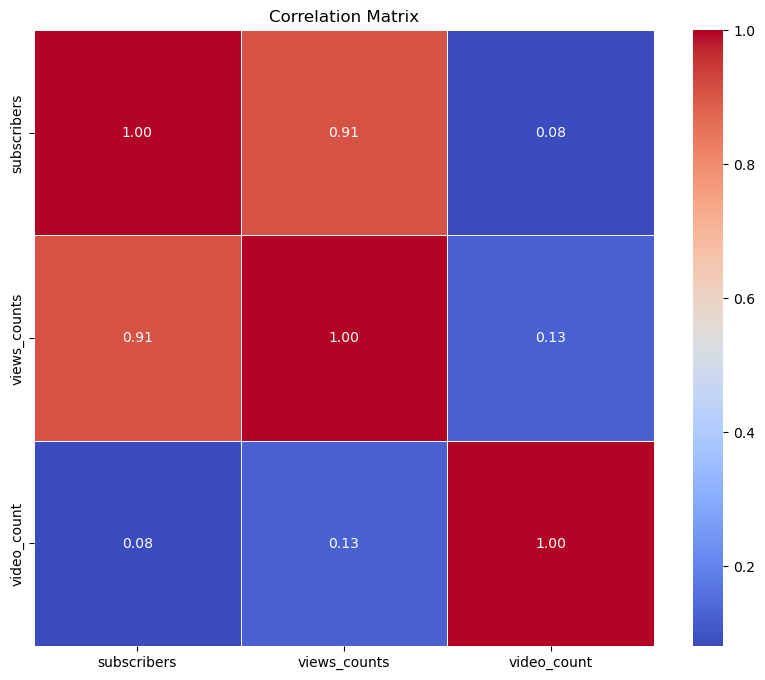

In [41]:
# Correlation matrix to understand relationships between numerical variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

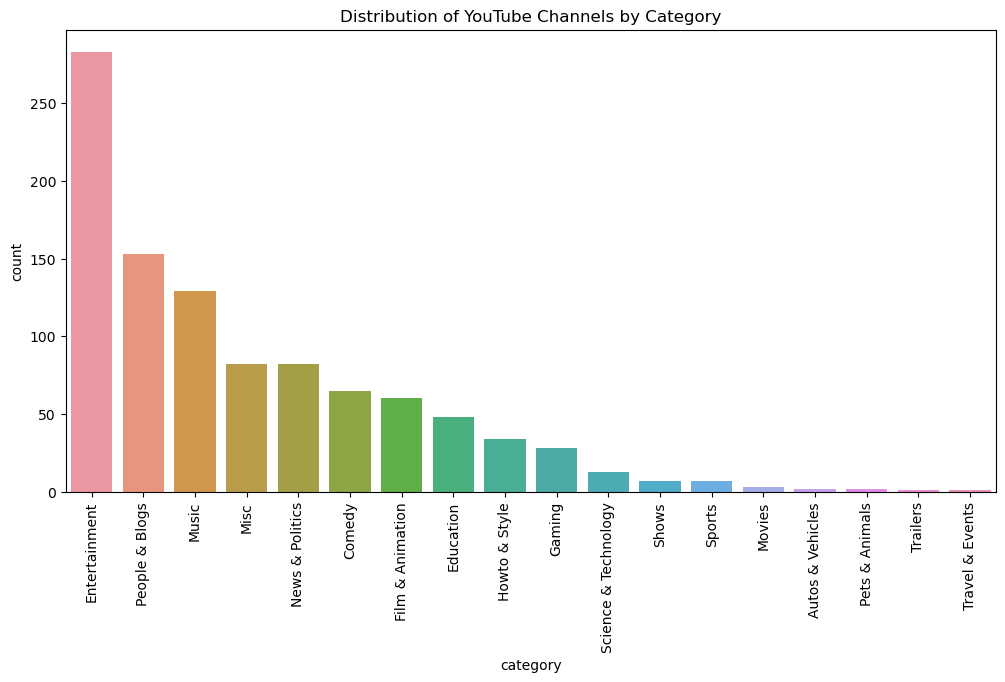

In [42]:
# Visualize the distribution of categories using a bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df, order=df['category'].value_counts().index)
plt.title('Distribution of YouTube Channels by Category')
plt.xticks(rotation=90)
plt.show()


channel_name    object
subscribers      int64
category        object
views_counts     int64
video_count      int64
started_year    object
rank            object
dtype: object


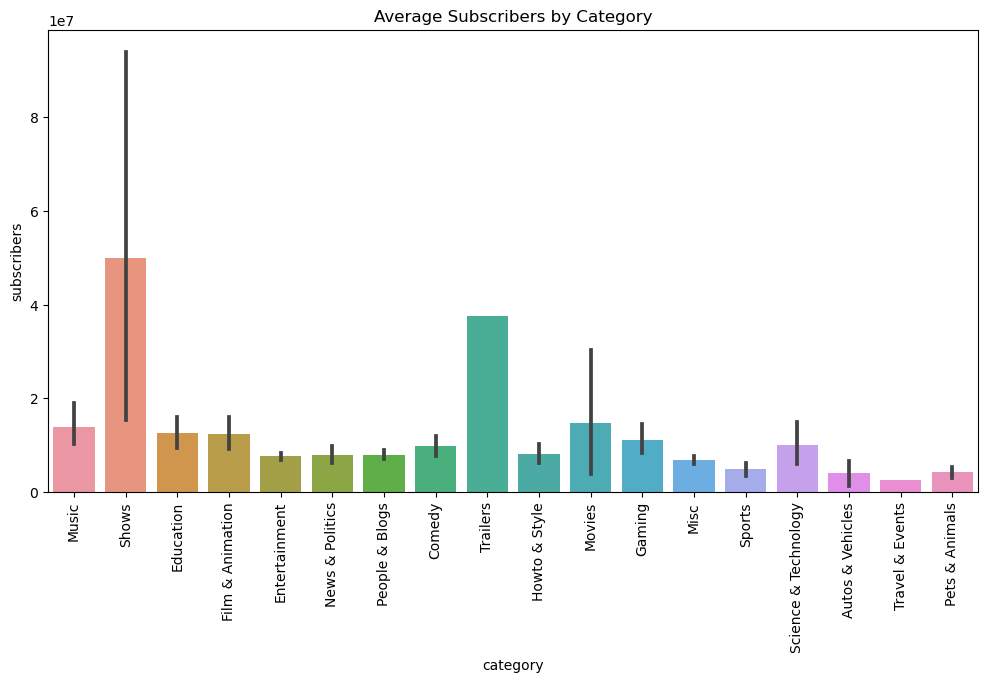

In [43]:
print(df.dtypes)

# If 'subscribers' is not numeric, convert it to a numeric type
# Replace 'subscribers' with the actual column name if different
df['subscribers'] = pd.to_numeric(df['subscribers'], errors='coerce')

# Explore the relationship between categories and subscribers using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='subscribers', data=df)
plt.title('Average Subscribers by Category')
plt.xticks(rotation=90)
plt.show()



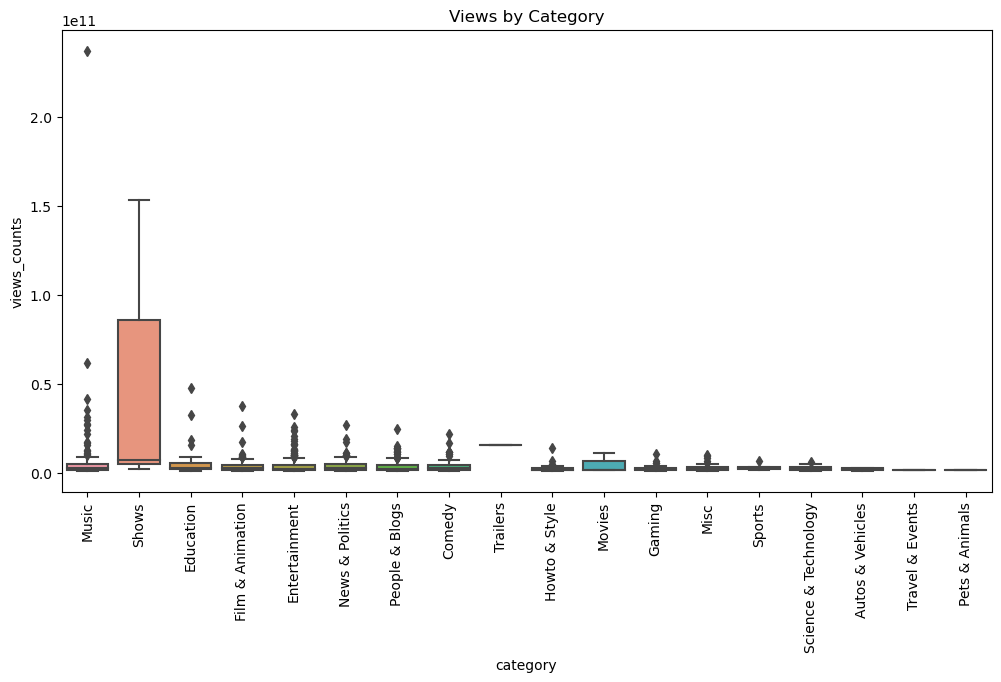

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='views_counts', data=df)
plt.title('Views by Category')
plt.xticks(rotation=90)
plt.show()


<Figure size 3000x3000 with 0 Axes>

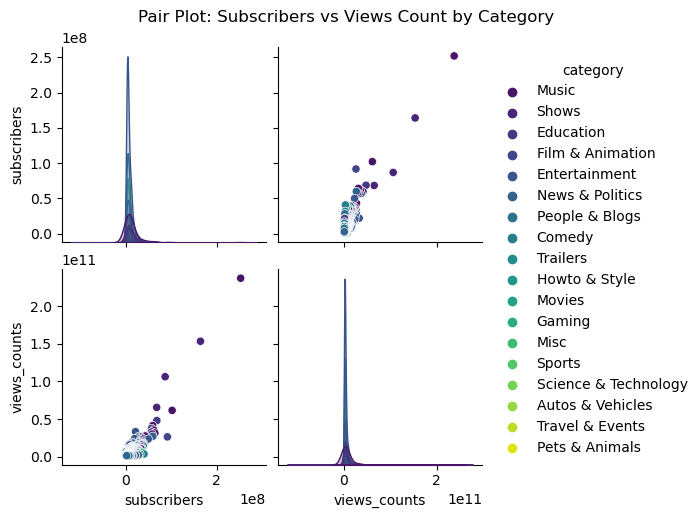

In [45]:


# Pair plot for relationship between subscribers, views_count, and category
plt.figure(figsize=(30,30))
sns.pairplot(df, vars=['subscribers', 'views_counts'], hue='category', palette='viridis')
plt.suptitle('Pair Plot: Subscribers vs Views Count by Category', y=1.02)
plt.show()


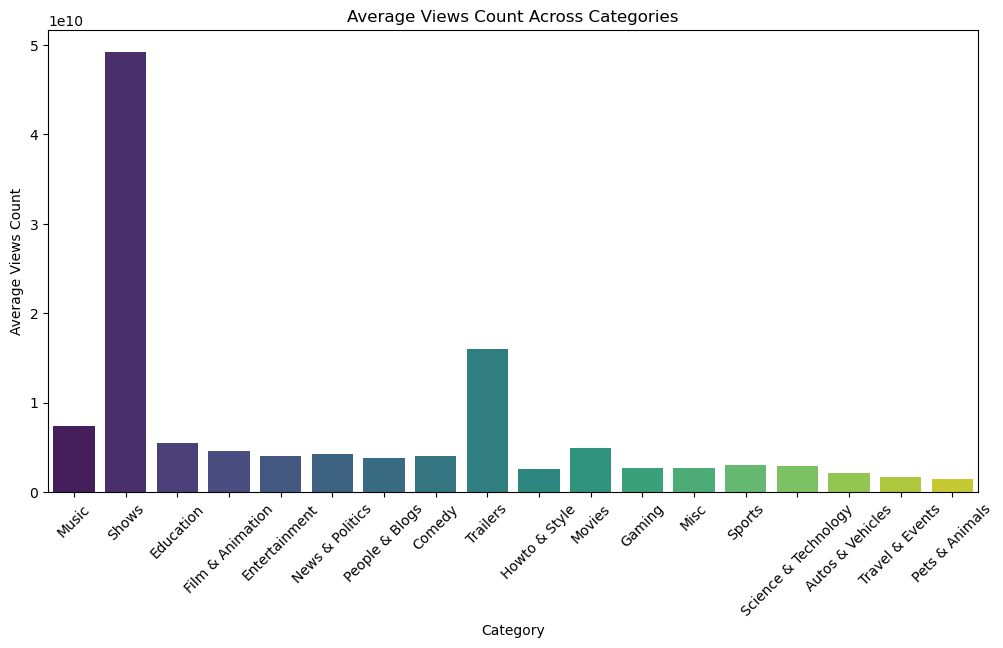

In [46]:
# Bar plot for average views count across categories
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='views_counts', data=df, errorbar=None, palette='viridis')
plt.title('Average Views Count Across Categories')
plt.xlabel('Category')
plt.ylabel('Average Views Count')
plt.xticks(rotation=45)
plt.show()


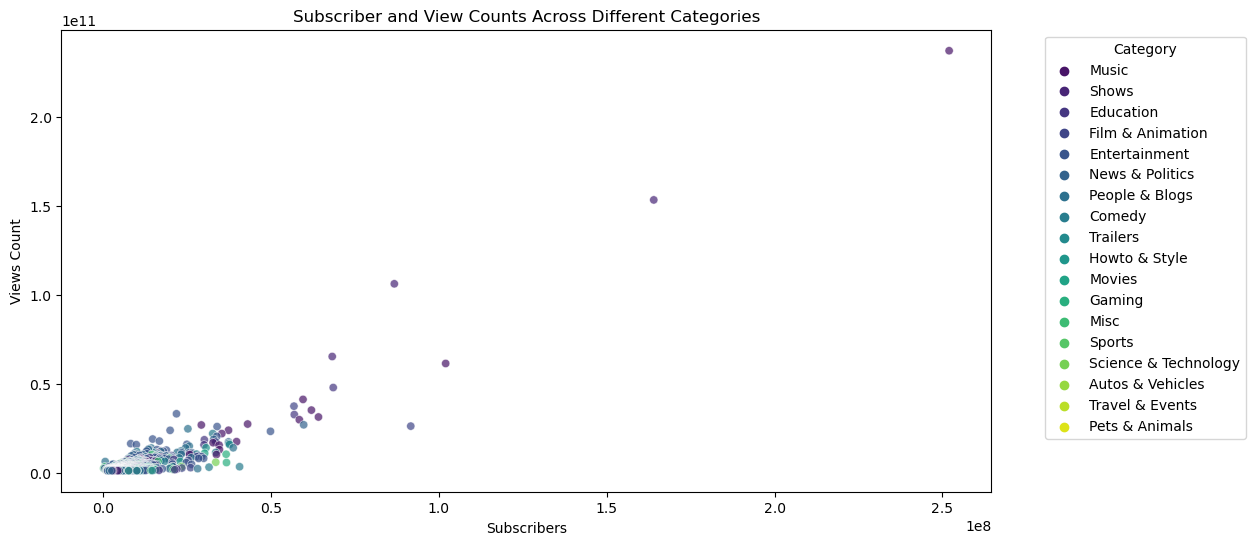

In [47]:
# Identify trends and patterns in subscriber and view counts across different categories
plt.figure(figsize=(12, 6))
sns.scatterplot(x='subscribers', y='views_counts', data=df, hue='category', palette='viridis', alpha=0.7)
plt.title('Subscriber and View Counts Across Different Categories')
plt.xlabel('Subscribers')
plt.ylabel('Views Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1500x800 with 0 Axes>

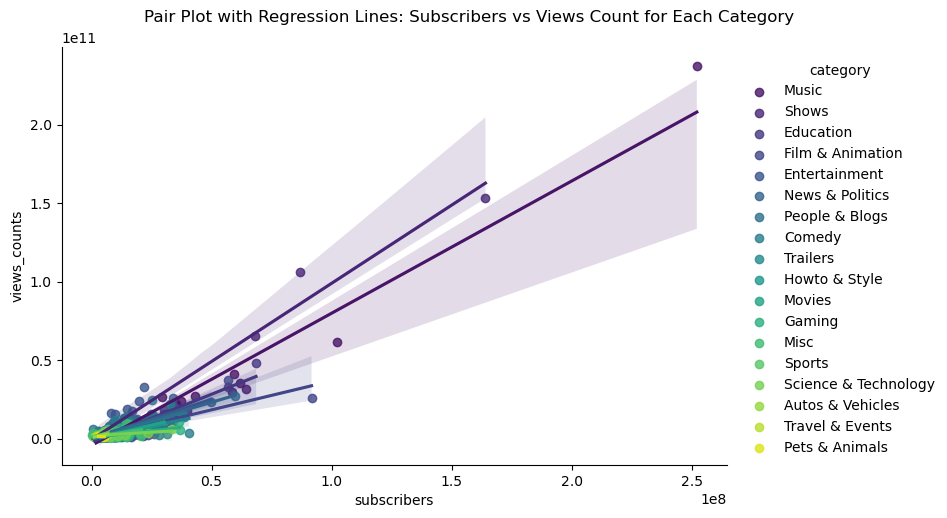

In [48]:
# Pair plot with regression lines for subscribers and views_count for each category
plt.figure(figsize=(15, 8))
sns.pairplot(df, x_vars=['subscribers'], y_vars=['views_counts'], hue='category', kind='reg', height=5, aspect=1.5, palette='viridis')
plt.suptitle('Pair Plot with Regression Lines: Subscribers vs Views Count for Each Category', y=1.02)
plt.show()



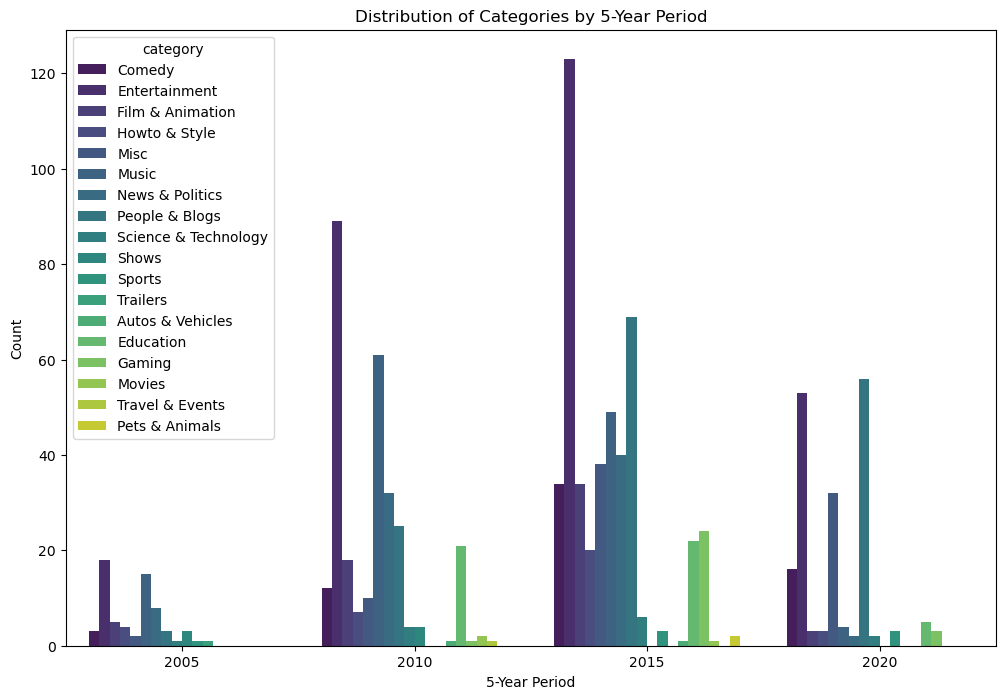

In [49]:




# Assuming 'started_year' is not in datetime format
df['started_year'] = pd.to_datetime(df['started_year'])  # Convert 'started_year' to datetime format

# Extract the 5-year period from the 'started_year' column
df['5_year_period'] = (df['started_year'].dt.year // 5) * 5

# Group by 5-year period and category, and count the number of occurrences
grouped_data = df.groupby(['5_year_period', 'category']).size().reset_index(name='count')

# Plot the distribution of categories for each 5-year period
plt.figure(figsize=(12, 8))
sns.barplot(x='5_year_period', y='count', hue='category', data=grouped_data, palette='viridis')
plt.title('Distribution of Categories by 5-Year Period')
plt.xlabel('5-Year Period')
plt.ylabel('Count')
plt.show()


In [50]:
df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_3636\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


subscribers  views_counts  video_count  5_year_period
subscribers       1.000000      0.908940     0.080140      -0.215682
views_counts      0.908940      1.000000     0.126503      -0.191299
video_count       0.080140      0.126503     1.000000      -0.222473
5_year_period    -0.215682     -0.191299    -0.222473       1.000000

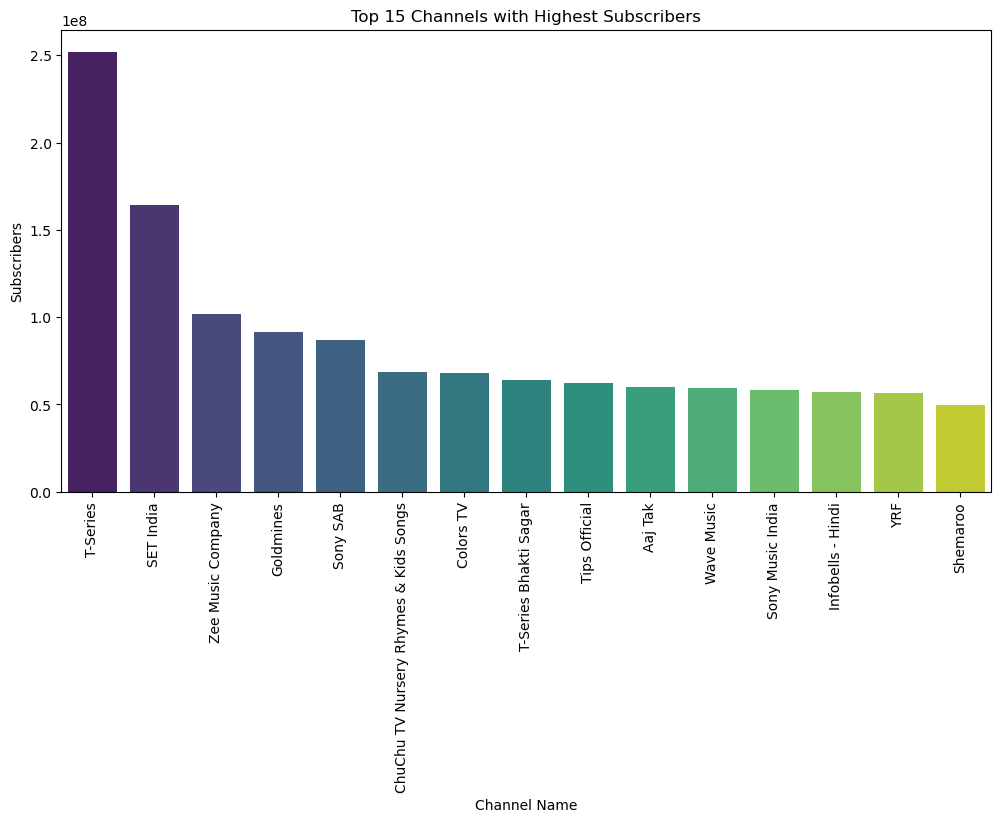

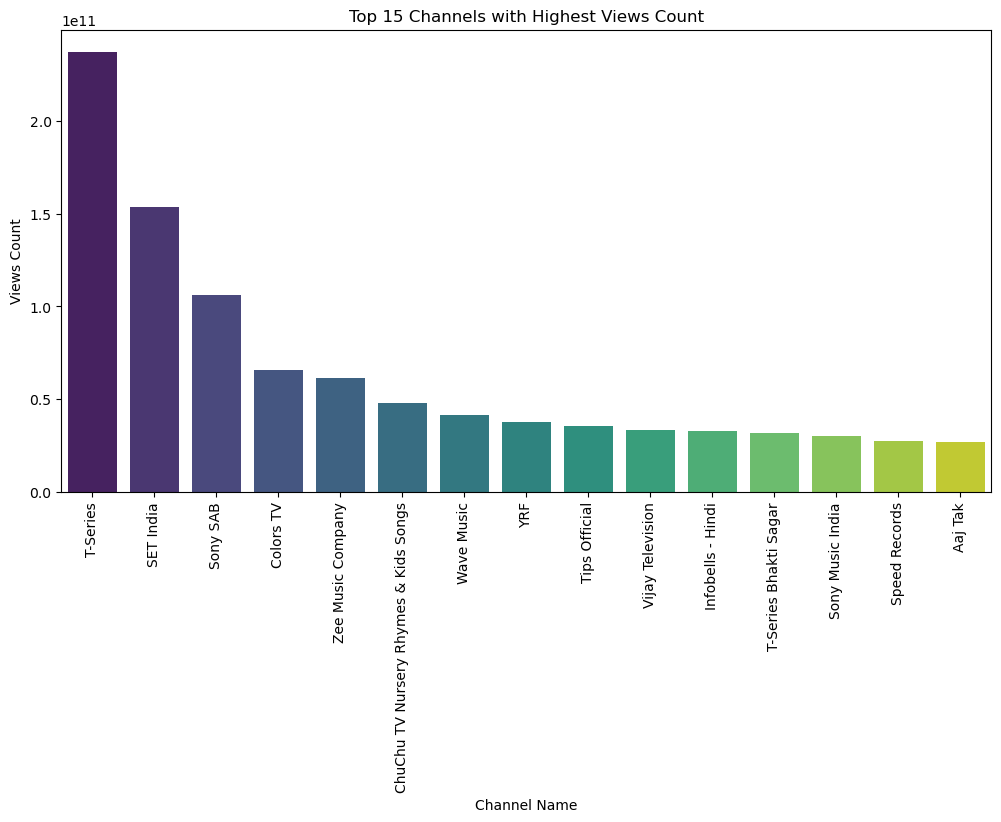

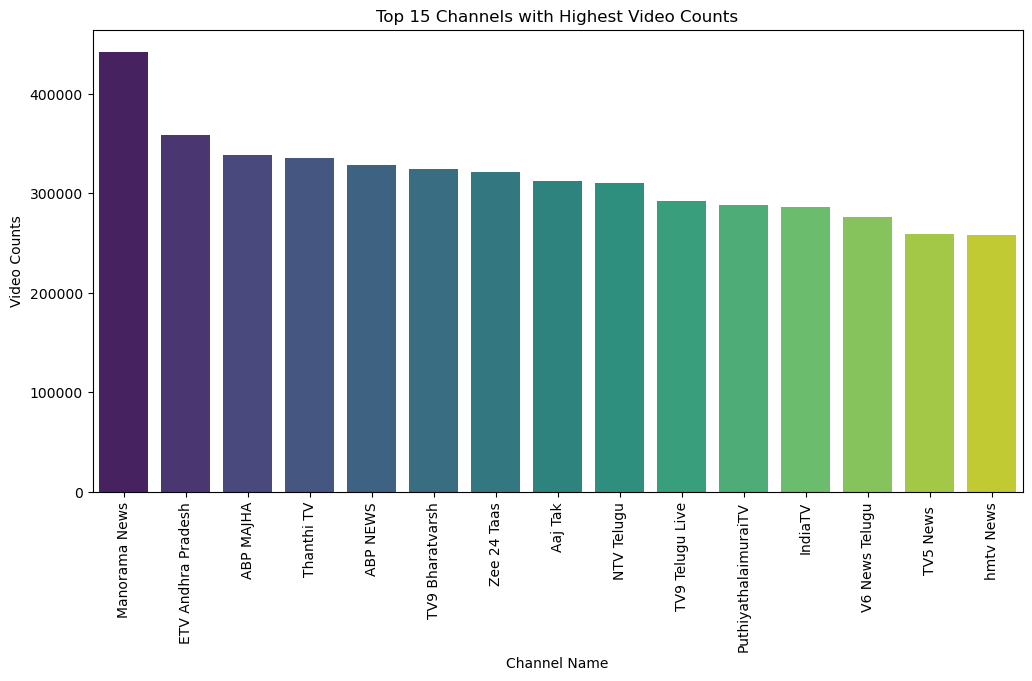

In [55]:


# Top 15 channels with highest subscribers
top_subscribers = df.nlargest(15, 'subscribers')

# Top 15 channels with highest views count
top_views = df.nlargest(15, 'views_counts')

# Top 15 channels with highest video counts
top_videos = df.nlargest(15, 'video_count')

# Plotting the top 15 channels with the highest subscribers
plt.figure(figsize=(12, 6))
sns.barplot(x='channel_name', y='subscribers', data=top_subscribers, palette='viridis')
plt.title('Top 15 Channels with Highest Subscribers')
plt.xlabel('Channel Name')
plt.ylabel('Subscribers')
plt.xticks(rotation=90)
plt.show()

# Plotting the top 15 channels with the highest views count
plt.figure(figsize=(12, 6))
sns.barplot(x='channel_name', y='views_counts', data=top_views, palette='viridis')
plt.title('Top 15 Channels with Highest Views Count')
plt.xlabel('Channel Name')
plt.ylabel('Views Count')
plt.xticks(rotation=90)
plt.show()

# Plotting the top 15 channels with the highest video counts
plt.figure(figsize=(12, 6))
sns.barplot(x='channel_name', y='video_count', data=top_videos, palette='viridis')
plt.title('Top 15 Channels with Highest Video Counts')
plt.xlabel('Channel Name')
plt.ylabel('Video Counts')
plt.xticks(rotation=90)
plt.show()




In [1]:


# # Top 15 channels with highest subscribers
# top_subscribers = df.nlargest(15, 'subscribers')

# # Top 15 channels with highest views count
# top_views = df.nlargest(15, 'views_counts')

# # Top 15 channels with highest video counts
# top_videos = df.nlargest(15, 'video_count')

# Plotting the top 15 channels with the highest subscribers
plt.figure(figsize=(12, 6))
sns.barplot(x='channel_name', y='', data=top_subscribers, palette='viridis')
plt.title('Top 15 Channels with Highest Subscribers')
plt.xlabel('Channel Name')
plt.ylabel('Subscribers')
plt.xticks(rotation=90)
plt.show()

# Plotting the top 15 channels with the highest views count
plt.figure(figsize=(12, 6))
sns.barplot(x='channel_name', y='views_counts', data=top_views, palette='viridis')
plt.title('Top 15 Channels with Highest Views Count')
plt.xlabel('Channel Name')
plt.ylabel('Views Count')
plt.xticks(rotation=90)
plt.show()

# Plotting the top 15 channels with the highest video counts
plt.figure(figsize=(12, 6))
sns.barplot(x='channel_name', y='video_count', data=top_videos, palette='viridis')
plt.title('Top 15 Channels with Highest Video Counts')
plt.xlabel('Channel Name')
plt.ylabel('Video Counts')
plt.xticks(rotation=90)
plt.show()




NameError: name 'plt' is not defined